# CNN on mnist with convolution visualization

This is heavily based on keras' example : https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

This is for the **keras v1** api

In [8]:
import os
#os.environ['THEANO_FLAGS']='mode=FAST_RUN,device=gpu,floatX=float32'

skipTraining = False # Skip training and load trained weights

# This gives a 'perform' error in compile
#os.environ['THEANO_FLAGS']='mode=FAST_COMPILE,device=gpu1,floatX=float32'
#os.environ['THEANO_FLAGS']='device=gpu0'

#os.environ['KERAS_BACKEND'] = 'tensorflow'
#os.environ['THEANO_FLAGS']='mode=FAST_COMPILE,device=cpu,floatX=float32'

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from __future__ import absolute_import
from __future__ import print_function
import pylab as pl
import matplotlib.cm as cm
import numpy as np
np.random.seed(1337) # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

%matplotlib inline

'''
    Train a simple convnet on the MNIST dataset.

    Run on GPU: THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python mnist_cnn.py

    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).
    16 seconds per epoch on a GRID K520 GPU.
'''

Using Theano backend.


'\n    Train a simple convnet on the MNIST dataset.\n\n    Run on GPU: THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python mnist_cnn.py\n\n    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).\n    16 seconds per epoch on a GRID K520 GPU.\n'

In [2]:
import theano
print(theano.config.device)

cpu


In [3]:
np.set_printoptions(precision=5, suppress=True)

In [4]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print('X_test shape:', X_test.shape)
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


label :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


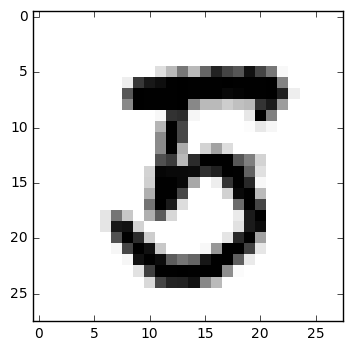

In [5]:
i = 4600
pl.imshow(X_train[i, 0], interpolation='nearest', cmap=cm.binary)
print("label : ", Y_train[i,:])

In [6]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=X_train.shape[1:]))
# The Dropout is not in the original keras example, it's just here to demonstrate how to
# correctly handle train/predict phase difference when visualizing convolutions below
model.add(Dropout(0.1))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(32, 3, 3))

convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [8]:
# Uncomment to visualize
#from IPython.display import SVG
#from keras.utils.visualize_util import model_to_dot
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
WEIGHTS_FNAME = 'mnist_cnn_weights_v1.hdf'
if skipTraining and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading existing weights')
    model.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    nb_epoch = 12
    model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
              verbose=1, validation_data=(X_test, Y_test))
    model.save_weights(WEIGHTS_FNAME, overwrite=True)
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 192s - loss: 0.3972 - acc: 0.8783 - val_loss: 0.0947 - val_acc: 0.9724
Epoch 2/12
60000/60000 [==============================] - 193s - loss: 0.1443 - acc: 0.9566 - val_loss: 0.0614 - val_acc: 0.9813
Epoch 3/12
60000/60000 [==============================] - 195s - loss: 0.1087 - acc: 0.9681 - val_loss: 0.0500 - val_acc: 0.9841
Epoch 4/12
60000/60000 [==============================] - 194s - loss: 0.0913 - acc: 0.9724 - val_loss: 0.0434 - val_acc: 0.9853
Epoch 5/12
60000/60000 [==============================] - 194s - loss: 0.0804 - acc: 0.9762 - val_loss: 0.0392 - val_acc: 0.9870
Epoch 6/12
60000/60000 [==============================] - 192s - loss: 0.0712 - acc: 0.9790 - val_loss: 0.0383 - val_acc: 0.9876
Epoch 7/12
60000/60000 [==============================] - 192s - loss: 0.0667 - acc: 0.9805 - val_loss: 0.0348 - val_acc: 0.9882
Epoch 8/12
60000/60000 [=======================

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.0.3/lib/python2.7/site-packages/keras/models.py:644: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Test score: 0.0354214187628
Test accuracy: 0.9885


In [11]:
print("Predicted: ")
print(model.predict(X_test[:5]))
print("Answer: ")
print(Y_test[:5])

Predicted: 
[[ 0.       0.       0.       0.       0.       0.       0.       1.       0.
   0.     ]
 [ 0.       0.       1.       0.       0.       0.       0.       0.       0.
   0.     ]
 [ 0.       0.99999  0.       0.       0.00001  0.       0.       0.       0.
   0.     ]
 [ 0.99996  0.       0.       0.       0.       0.       0.00004  0.       0.
   0.     ]
 [ 0.       0.       0.       0.       0.99999  0.       0.       0.       0.
   0.00001]]
Answer: 
[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [12]:
Y_pred = model.predict(X_test)
# Convert one-hot to index
y_pred = np.argmax(Y_pred, axis=1)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      1.00      0.99      1135
          2       0.99      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       0.99      1.00      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.98      0.99      0.98      1028
          8       1.00      0.98      0.99       974
          9       0.99      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000



## Convolution visualizations

In [14]:
from keras import backend as K

In [15]:
# K.learning_phase() is a flag that indicates if the network is in training or
# predict phase. It allow layer (e.g. Dropout) to only be applied during training
inputs = [K.learning_phase()] + model.inputs

_convout1_f = K.function(inputs, [convout1.output])
def convout1_f(X):
    # The [0] is to disable the training phase flag
    return _convout1_f([0] + [X])

In [16]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)

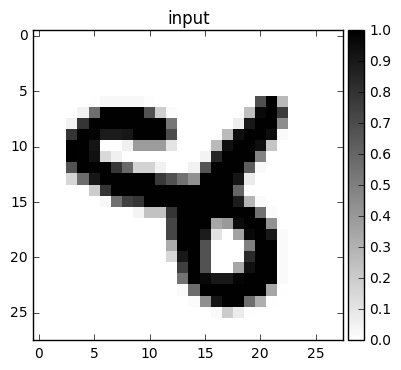

In [21]:
i = 4601

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1]

pl.figure()
pl.title('input')
nice_imshow(pl.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.binary)

In [22]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

#pl.imshow(make_mosaic(np.random.random((9, 10, 10)), 3, 3, border=1))

W shape :  (32, 3, 3)


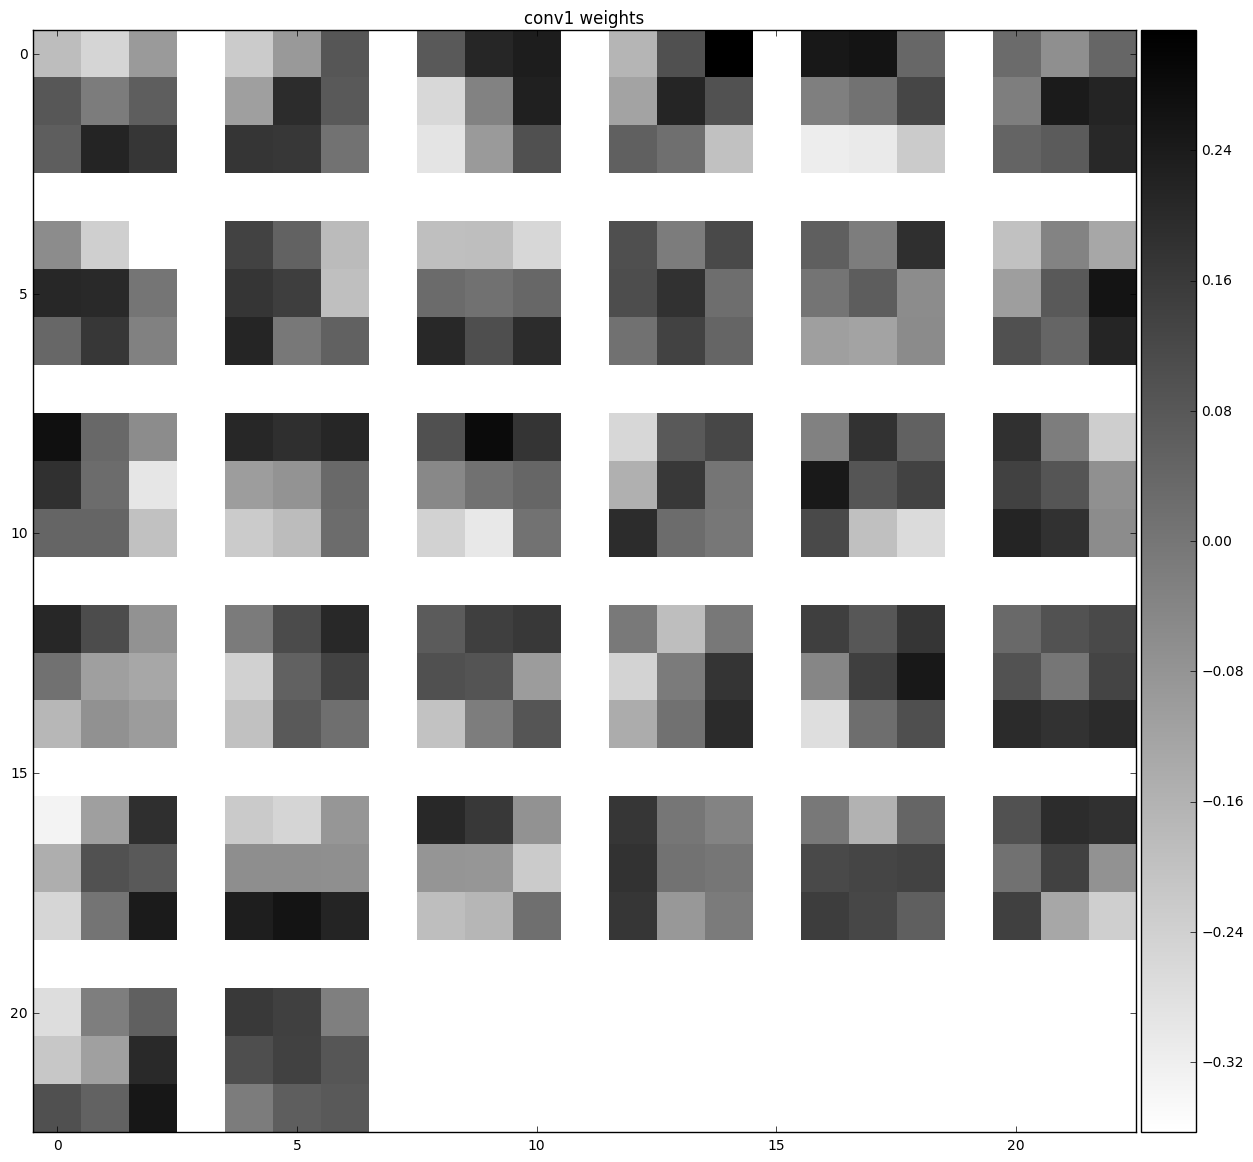

In [23]:
# Visualize weights
W = model.layers[0].W.get_value(borrow=True)
W = np.squeeze(W)
print("W shape : ", W.shape)

pl.figure(figsize=(15, 15))
pl.title('conv1 weights')
nice_imshow(pl.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)

C1 shape :  (32, 26, 26)


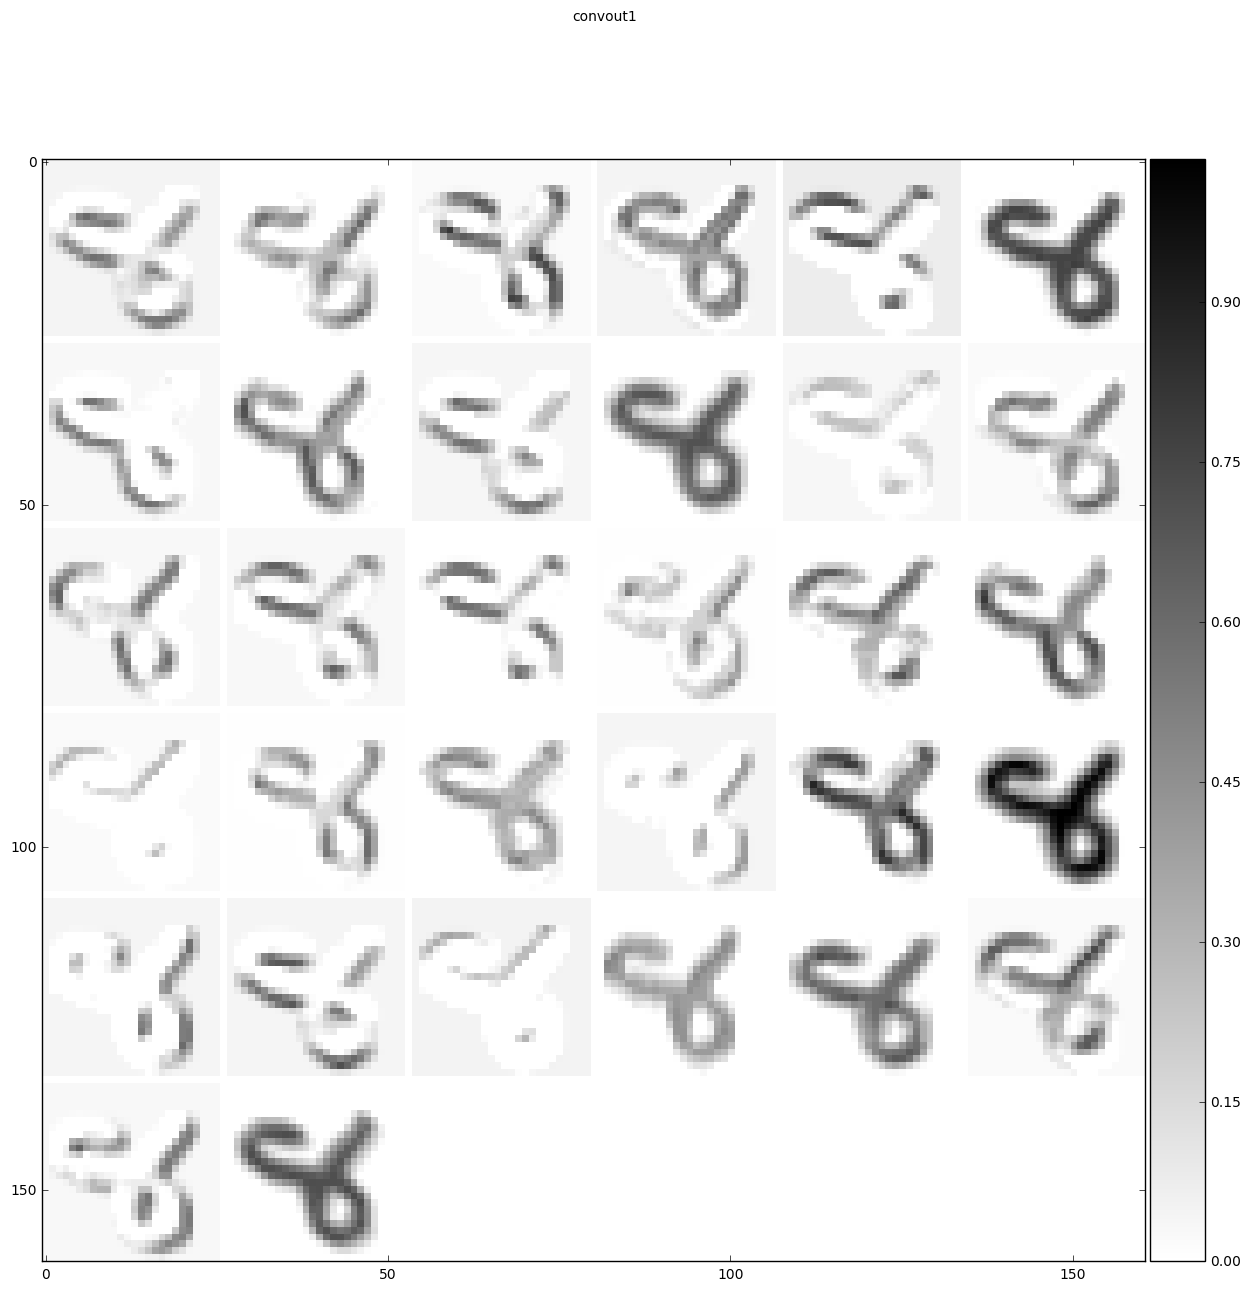

In [24]:
# Visualize convolution result (after activation)
C1 = convout1_f(X)
C1 = np.squeeze(C1)
print("C1 shape : ", C1.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout1')
nice_imshow(pl.gca(), make_mosaic(C1, 6, 6), cmap=cm.binary)

# Train on cspad images

In [1]:
import psana
ds = psana.DataSource('exp=cxitut13:run=10:idx')
run = ds.runs().next()
times = run.times()
numEvents = len(times)
env = ds.env()
eventNumber = 11
evt = run.event(times[eventNumber])
det = psana.Detector('DscCsPad',env)
img = det.image(evt)
# input image dimensions
(img_rows, img_cols) = img.shape

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.0.3/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


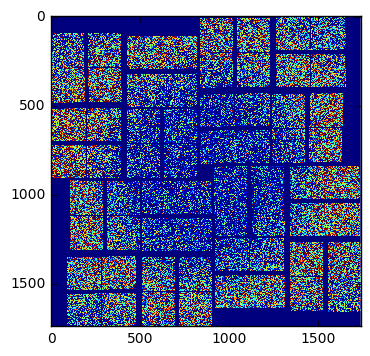

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img,interpolation='none',vmax=50,vmin=0)
plt.show()

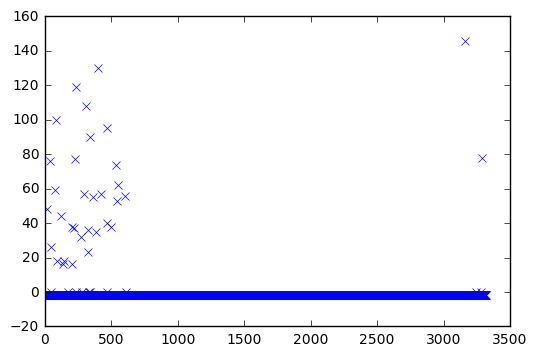

In [7]:
import h5py
f = h5py.File('/reg/d/psdm/cxi/cxitut13/scratch/yoon82/psocake/r0010/cxitut13_0010.cxi','r')
indexed = f['/entry_1/result_1/index'].value
f.close()
plt.plot(indexed,'x')
plt.show()